In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data_middle_motion = open('data_middle_motion.json')
data_much_motion = open('data_much_motion.json')
data_no_motion = open('data_no_motion.json')

data_middle_motion = json.load(data_middle_motion)

for message in data_middle_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']


data_much_motion = json.load(data_much_motion)

for message in data_much_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']

data_no_motion = json.load(data_no_motion)

for message in data_no_motion["messages"]:
    parsedPayload = json.loads(message["payload"])
    if "accel_x"  in parsedPayload:
        message["accel_x"] = parsedPayload["accel_x"]
    elif "accel_y"  in parsedPayload:
        message["accel_y"] = parsedPayload["accel_y"]
    elif "accel_z"  in parsedPayload:
        message["accel_z"] = parsedPayload["accel_z"]
    elif "temperature"  in parsedPayload:
        message["temperature"] = parsedPayload["temperature"]
    del message['payload']
    del message['retain']
    del message['qos']
    del message['out']
    del message['topic']


In [3]:
data_middle_motion = pd.DataFrame(data_middle_motion["messages"])
data_middle_motion['createAt'] =  pd.to_datetime(data_middle_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_middle_motion['timestamp'] = data_middle_motion['createAt'].astype(np.int64) / int(1e6)
data_middle_motion = data_middle_motion.sort_values(['id', 'createAt'])
data_middle_motion = (data_middle_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_middle_motion  = data_middle_motion[data_middle_motion['id'].notna()]

In [4]:
data_much_motion = pd.DataFrame(data_much_motion["messages"])
data_much_motion['createAt'] =  pd.to_datetime(data_much_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_much_motion['timestamp'] = data_much_motion['createAt'].astype(np.int64) / int(1e6)
data_much_motion = data_much_motion.sort_values(['id', 'createAt'])
data_much_motion = (data_much_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_much_motion  = data_much_motion[data_much_motion['id'].notna()]

In [5]:
data_no_motion = pd.DataFrame(data_no_motion["messages"])
data_no_motion['createAt'] =  pd.to_datetime(data_no_motion['createAt'], format='%Y-%m-%d %H:%M:%S:%f')
data_no_motion['timestamp'] = data_no_motion['createAt'].astype(np.int64) / int(1e6)
data_no_motion = data_no_motion.sort_values(['id', 'createAt'])
data_no_motion = (data_no_motion.groupby(pd.Grouper(key='createAt', freq='3s'))
             .last()
             .reset_index()
         )
data_no_motion  = data_no_motion[data_no_motion['id'].notna()]

# Export to CSV

In [6]:
data_no_motion.to_csv("data_no_motion.csv", encoding='utf-8', index=False)
data_much_motion.to_csv("data_much_motion.csv", encoding='utf-8', index=False)
data_middle_motion.to_csv("data_middle_motion.csv",
                          encoding='utf-8', index=False)

In [7]:
summary_data_no_motion = data_no_motion.describe()
summary_data_middle_motion = data_middle_motion.describe()
summary_data_much_motion = data_much_motion.describe()
print(summary_data_no_motion)
print(summary_data_middle_motion)
print(summary_data_much_motion)
print(summary_data_no_motion["accel_z"]["mean"])
print(summary_data_middle_motion["accel_z"]["mean"])
print(summary_data_much_motion["accel_z"]["mean"])

         accel_x    accel_y    accel_z  temperature     timestamp
count  62.000000  62.000000  62.000000    62.000000  6.200000e+01
mean    2.898673  11.459613  -1.078584    27.085595  1.657791e+12
std     0.031538   0.029921   0.045026     0.099220  9.019853e+04
min     2.842673  11.401800  -1.186840    26.882940  1.657790e+12
25%     2.874378  11.434105  -1.105484    27.024120  1.657790e+12
50%     2.892922  11.456830  -1.074377    27.071170  1.657791e+12
75%     2.918646  11.480760  -1.055235    27.165290  1.657791e+12
max     2.979064  11.521440  -0.985843    27.259410  1.657791e+12
         accel_y    accel_z  temperature    accel_x     timestamp
count  62.000000  62.000000    62.000000  62.000000  6.200000e+01
mean   11.398095  -0.814216    26.797930   3.192411  1.657791e+12
std     0.707299   2.845591     0.089304   2.669353  9.022522e+04
min     9.860823  -5.718846    26.647650  -2.098505  1.657791e+12
25%    10.873580  -3.285346    26.741760   1.487737  1.657791e+12
50%    11.

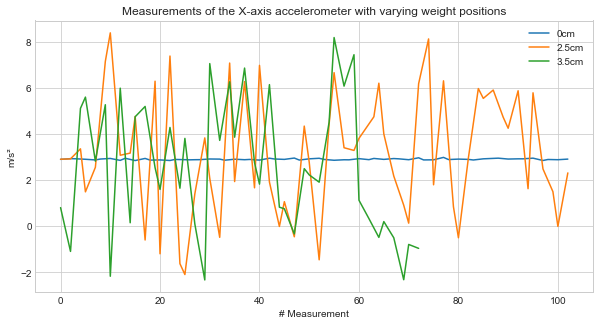

In [19]:


fig, ax = plt.subplots(1, 1, figsize=(10, 5))

plt.plot(data_no_motion["accel_x"] , label="0cm")
plt.plot(data_middle_motion["accel_x"] , label="2.5cm")
plt.plot(data_much_motion["accel_x"] , label="3.5cm")

ax.set_title('Measurements of the X-axis accelerometer with varying weight positions')
ax.set_ylabel('m/s²')
ax.set_xlabel('# Measurement')
ax.legend(loc='best')


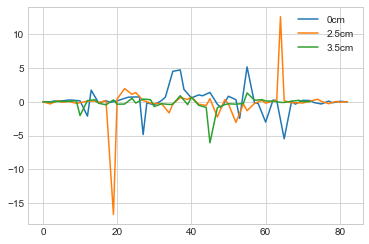

In [25]:
from numpy.fft import fft, fftfreq, ifft


fft_no_motion = np.fft.fftfreq(50, data_no_motion["accel_z"][0:50])
fft_middle_motion = np.fft.fftfreq(50, data_middle_motion["accel_z"][0:50])
fft_much_motion = np.fft.fftfreq(44, data_much_motion["accel_z"][0:44])
plt.plot(fft_no_motion, label="0cm")
plt.plot(fft_middle_motion, label="2.5cm")
plt.plot(fft_much_motion, label="3.5cm")
plt.legend()


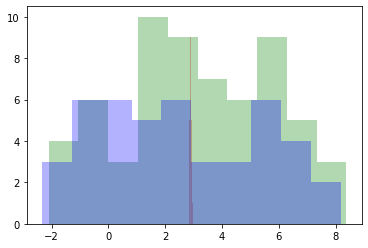

In [10]:
plt.hist( data_no_motion["accel_x"], color='r', alpha=0.3)
plt.hist( data_middle_motion["accel_x"], color='g', alpha=0.3)
plt.hist( data_much_motion["accel_x"], color='b', alpha=0.3)
plt.show()

In [11]:
data_no_motion_ts = pd.DataFrame({"Time":data_no_motion["createAt"],"raw":data_no_motion["accel_x"]})
data_no_motion_ts['Time'] = pd.to_datetime(data_no_motion_ts['Time'])
data_no_motion_ts.reset_index()
data_no_motion_ts.set_index('Time',inplace=True)
data_no_motion_ts

,raw
Time,
2022-07-14 09:20:21,2.892922
2022-07-14 09:20:27,2.924029
2022-07-14 09:20:30,2.919244
2022-07-14 09:20:36,2.897708
2022-07-14 09:20:42,2.868994
...,...
2022-07-14 09:25:06,2.945565
2022-07-14 09:25:12,2.845066
2022-07-14 09:25:15,2.888137


                          raw
Time                         
2022-07-14 09:20:21  2.892922
2022-07-14 09:20:27  2.924029
2022-07-14 09:20:30  2.919244
2022-07-14 09:20:36  2.897708
2022-07-14 09:20:42  2.868994
...                       ...
2022-07-14 09:25:06  2.945565
2022-07-14 09:25:12  2.845066
2022-07-14 09:25:15  2.888137
2022-07-14 09:25:21  2.878566
2022-07-14 09:25:27  2.904887

[62 rows x 1 columns]


[<AxesSubplot:>]

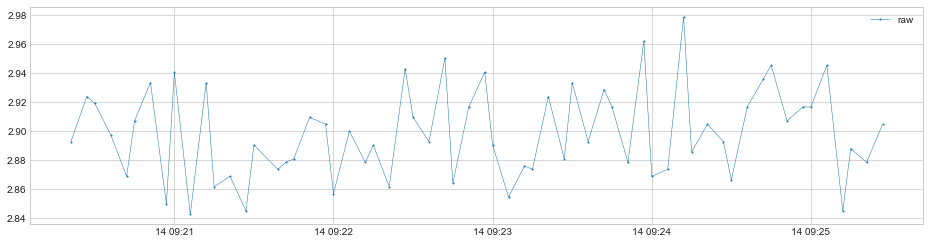

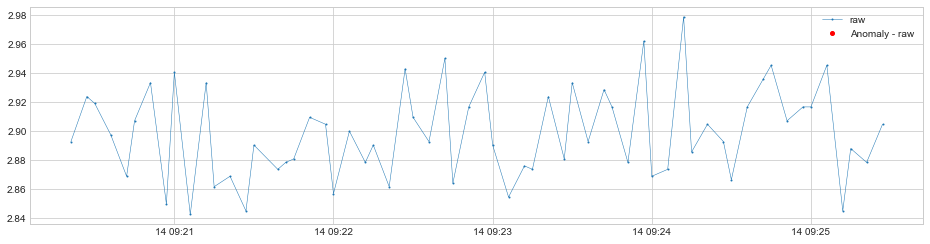

In [12]:
import pandas as pd
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import InterQuartileRangeAD
s_train = data_no_motion_ts
s_train = validate_series(s_train)
print(s_train)
plot(s_train)

seasonal_ad = InterQuartileRangeAD()
anomalies = seasonal_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")